In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/Users/gautammehta/Downloads/startup_funding.csv')

# dropped the remark column
df.drop(columns=['Remarks'],inplace=True)

# changing the index as index is given in the form of Serial number
df.set_index('Sr No',inplace=True)

# Rename columns

df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'InvestmentnType':'round_number',
    'Amount in USD':'amount'
},inplace=True)

# Conver the amount to crore rupees
df['amount']=df['amount'].str.replace(',','')
df['amount']=df['amount'].str.replace('undisclosed','0')
df['amount']=df['amount'].str.replace('Undisclosed','0')
df['amount']=df['amount'].str.replace('unknown','0')
df['amount']=df['amount'].fillna(0)

df=df[df['amount'].str.isdigit().fillna(False)]
df['amount']=df['amount'].astype('float')
df.info()


def crore_INR(dollar):
    inr=dollar*82.5
    return(inr/10000000)

df['amount']=df['amount'].apply(crore_INR)
df





In [ ]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df

In [ ]:
df['date'].dt.year
df

In [ ]:
df=df.dropna(subset=['date','Startup Name','vertical','city','Investors Name','round_number','amount'])
df


In [ ]:
df

In [ ]:
df.to_csv('startup_cleaned.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/Users/gautammehta/PycharmProjects/Startup Dashboard/startup_cleaned.csv')

In [76]:
df[df['Investors Name'].str.contains('Tiger Global Management')][['date','Startup Name','vertical','city','round_number','amount']].head(5)



,date,Startup Name,vertical,city,round_number,amount
0,2020-09-01,BYJU’S,E-Tech,Bengaluru,Private Equity Round,1650.000
34,2019-11-07,Moglix,E-Commerce,Singapore,Series D,495.000
48,2019-10-06,OkCredit,FinTech,Haryana,Series A,127.875
56,2019-02-05,Zenoti,Saas,Hyderabad,Series C,412.500
64,2019-11-04,CleverTap,SaaS,Mumbai,Series B,214.500


In [77]:
df[df['Investors Name'].str.contains('Tiger Global Management')].groupby('Startup Name')['amount'].sum().sort_values(ascending=False)

Startup Name
BYJU’S         1650.000
Saavn           825.000
Shopclues       825.000
Delhivery       701.250
Moglix          495.000
Zenoti          412.500
Grey Orange     247.500
Zo Rooms        247.500
CleverTap       214.500
BlackBuck       206.250
OkCredit        127.875
Lybrate          84.150
Cube26           63.525
Vedantu          41.250
Name: amount, dtype: float64

<Axes: ylabel='amount'>

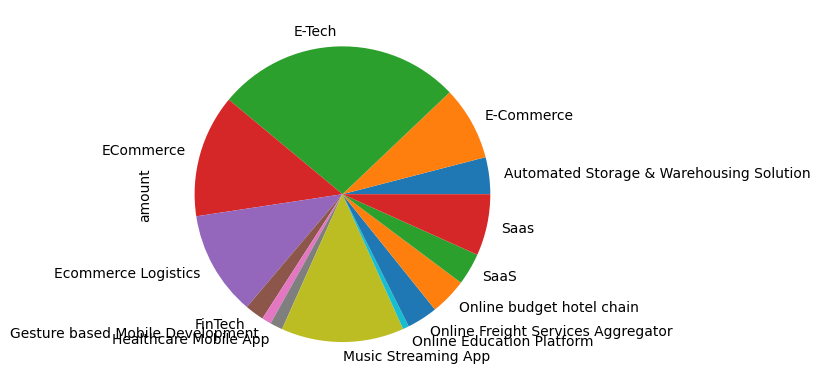

In [83]:
df[df['Investors Name'].str.contains('Tiger Global Management')].groupby('vertical')['amount'].sum().plot(kind='pie')

In [93]:
df['year']=df['date'].astype('datetime64[ns]').dt.year

In [96]:
df[df['Investors Name'].str.contains('Tiger Global Management')].groupby('year')['amount'].sum()

year
2015    2416.425
2016     825.000
2019    1249.875
2020    1650.000
Name: amount, dtype: float64

In [98]:
int(df['amount'].sum())

122799

751